# BCN 2020-2021 Model

**Model used: Random Forest Classifier**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

**Index**

1. [Environment](#Environment)
2. [Feature Preprocessing ](#FeaturePreprocessing )
3. [Model](#Model)
    - Gridsearch
    - Random Forest Classifier (with best params)
    - Feature Importance
    - Tree Visualization


4. [Conclusions](#Conclusions)

## Environment

#### Import libraries

In [37]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Maths
import math
from scipy import stats

#Transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

#### Import data

In [38]:
apps_trans = pd.read_csv("apps_BCN20201_clean_Sel_addCols.csv")

In [39]:
apps_trans.shape

(116, 22)

In [40]:
apps_trans.head()

,Bootcamp Course,Bootcamp Format,how did you hear about us?,Person Account: Tech Background,Person Account: Gender,Person Account: Highest degree received,Person Account: Looking for a Job,Person Account: Nationality,Stage Duration,Hours Before First Touchpoint,...,Paid Deposit,Time to first touchpoint - days,Time First touchpoint to Close date - days,Scholarship,Discount,Time Conversion - days,Time between Created Date and Start Date - days,Discount(%),Creater Month,Creater Quarter
0,WD,FT,Referral,No experience,Female,Bachelor Degree,Yes,Americas,77.0,1010.94,...,0,42,34,0,1,76,74,0.10,7,3
1,WD,FT,Referral,I don´t have experience,Male,No Formal Schooling,Yes,Spain,229.0,1275.60,...,0,53,5,0,0,58,148,0.00,2,1
2,UX,PT,Referral,Beginning learner,Male,Bachelor Degree,Yes,Spain,102.0,149.47,...,1,6,36,0,1,42,74,0.07,7,3
3,DA,FT,newspaperOrMagazine,No experience,Male,Bachelor Degree,Yes,Spain,218.0,1.69,...,1,0,70,0,0,70,206,0.00,3,1
4,DA,FT,google,No experience,Female,Bachelor Degree,Yes,Americas,99.0,88.11,...,0,4,1,0,1,5,116,0.10,6,2


## Feature Preprocessing 
It turns raw data into a one that is usable by a machine learning model.

In [41]:
features_to_encode = apps_trans.columns[apps_trans.dtypes==object].tolist()

In [42]:
col_transformer_e = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), features_to_encode),
    remainder="passthrough")

## Model

In [43]:
X = apps_trans.drop(['Paid Deposit'],axis=1)
y = apps_trans['Paid Deposit']

#### Gridsearch

In [44]:
def gridsearch(X,y):
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 2, stop = 30, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create Params
    param_grid = {
    'randomforestclassifier__bootstrap': bootstrap,
    'randomforestclassifier__max_features': max_features,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__n_estimators': n_estimators
    }
    
    # Create a based model
    rf_classifier = RandomForestClassifier()
    #pipe = make_pipeline(col_transformer_e, rf_classifier)

    pipe = make_pipeline(col_transformer_e, TomekLinks(sampling_strategy='majority'), rf_classifier)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # X,y or X_train,y_train - might change depending on the circumstances of the model
    grid_search.fit(X, y)
    
    return grid_search.best_estimator_

In [45]:
best_model= gridsearch(X,y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.3min finished


In [46]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bootcamp Course',
                                                   'Bootcamp Format',
                                                   'how did you hear about us?',
                                                   'Person Account: Tech '
                                                   'Background',
                                                   'Person Account: Gender',
                                                   'Person Account: Highest '
                                                   'degree received',
                                                   'Person Account: Looking '
                                                   'for a Job',
                 

#### Random Forest Classifier
Using its best params that we got from Gridsearch

In [47]:
def rfc_report(X, y, model, target_names = ['Not Paid Deposit', 'Paid Deposit']):
    
    results = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    

    cv = cross_val_score(model, X, y, cv=StratifiedKFold(), scoring = "accuracy")
    
    clf = model.fit(X, y)
    y_pred=clf.predict(X)
        
    print("Classification Report")
    print(classification_report(y, y_pred, target_names=target_names))
    print("Confusion_matrix \n",confusion_matrix(y, y_pred),"\n")
        
    results.append(cv)
    
    final_df = pd.DataFrame(cv)
    final_df.rename(columns={0:'Cross Validaton Score'},inplace=True)
    
    print(final_df)

In [48]:
X = apps_trans.drop(['Paid Deposit'],axis=1)
y = apps_trans['Paid Deposit']
rfc_report(X, y, best_model)

Classification Report
                  precision    recall  f1-score   support

Not Paid Deposit       0.94      0.98      0.96        84
    Paid Deposit       0.93      0.84      0.89        32

        accuracy                           0.94       116
       macro avg       0.94      0.91      0.92       116
    weighted avg       0.94      0.94      0.94       116

Confusion_matrix 
 [[82  2]
 [ 5 27]] 

   Cross Validaton Score
0               0.791667
1               0.782609
2               0.782609
3               0.695652
4               0.782609


**Interpretation**

- **The Classification Report:**
    - **Accuracy** tells you what percentage of the predictions are correct.
    - **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
    - **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
    - **F1-score** seeks a balance between precision and recall.


- **Confusion_matrix**
    - T0 (True Not Paid Deposit): 82 
    - F0 (False Not Paid Deposit): 2
    - T1 (True Paid Deposit): 27
    - F1 (False Paid Deposit): 5


- **Cross Validaton Score**

    It is the technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

## FeatureImportance

In [49]:
def rf_feature_importance(model):
    
    rf=best_model.steps[2][1]
    
    ct=best_model.steps[0][1]
    ct_cols=ct.get_feature_names()
    
    importances = pd.DataFrame({'feature':ct.get_feature_names(),'importance':np.round(rf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    
    top20=importances[:20]
    least20=importances[73:]

    top20.plot.barh()
    plt.title('Top20 RF Feature Importance')

    plt.show()

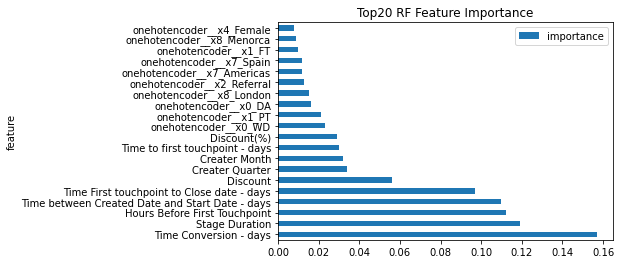

In [50]:
rf_feature_importance(best_model)

## TreeVisualization

In [51]:
# Extract single tree
feature_names = best_model.steps[0][1].get_feature_names()
target_names = ['Not Paid Deposit', 'Paid Deposit']
estimator = best_model.steps[2][1].estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'BCN01_M_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'BCN01_M_tree.png')

## Conclusion

After we have a small dataset for BCN from 2020-2021 the model has gave a pretty good results. And the above tree gives us an example of how machine learning could help us not only predict enrolments but also help us to make the right moves during our process of admissions, in terms of timing and in terms of resources.

Looking both campus trees we can confirm that, eventhough the important features might be similar between 2 campuses, the way we follow the prospect might differ (for example the discount %).